<a href="https://colab.research.google.com/github/RatnaVybhav/calculator/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_csv('heart_clean.csv')

In [ ]:
df.shape

(270, 14)

In [ ]:
df.head()

,Age,Sex,cp,BP,Cholesterol,FBS over 120,EKG results,thalach,Exercise angina,ST depression,slope,Number of vessels fluro,Thallium,Heart
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
df.Heart.value_counts()

0    150
1    120
Name: Heart, dtype: int64

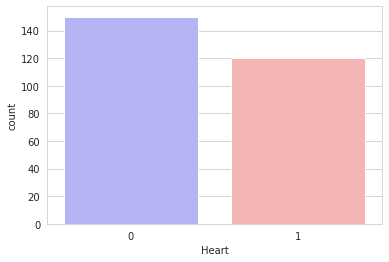

In [ ]:
sns.countplot(x="Heart", data=df, palette="bwr")
plt.show()

In [ ]:
countNoDisease = len(df[df.Heart == 0])
countHaveDisease = len(df[df.Heart == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.Heart))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.Heart))*100)))

Percentage of Patients Haven't Heart Disease: 55.56%
Percentage of Patients Have Heart Disease: 44.44%


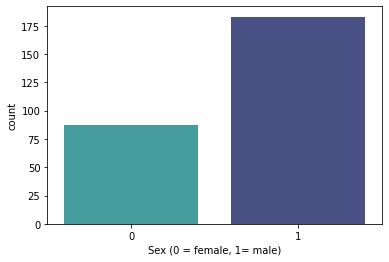

In [ ]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
df.groupby('Heart').mean()

,Age,Sex,cp,BP,Cholesterol,FBS over 120,EKG results,thalach,Exercise angina,ST depression,slope,Number of vessels fluro,Thallium
Heart,,,,,,,,,,,,,
0,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
1,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


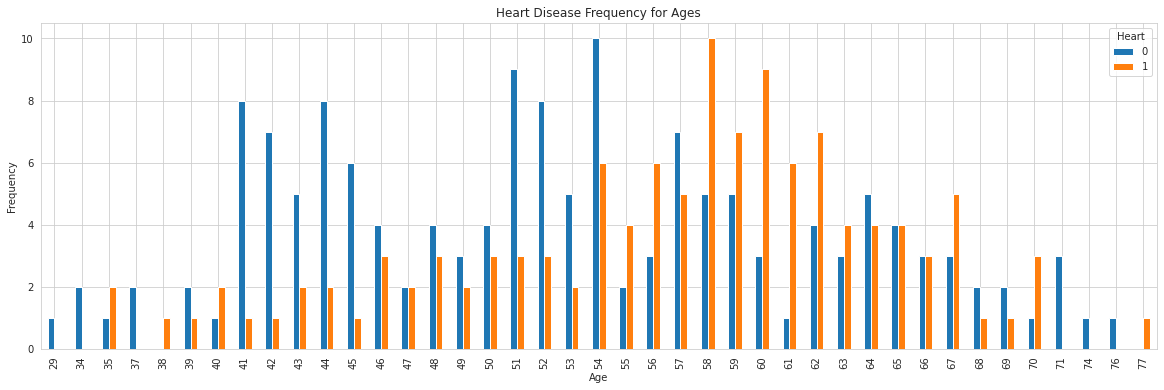

In [ ]:
pd.crosstab(df.Age,df.Heart).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


In [ ]:
X = df.drop('Heart', axis=1)
y = df.Heart

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [ ]:
accuracies = {}

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
scoresReg = list(cross_val_score(lr, X, y, cv=10))
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("Accuracy with logistic regression and Kforcross validation {:.2f}".format(max(scoresReg)*100))  #k-fold cross validation

Test Accuracy 82.72%
Accuracy with logistic regression and Kforcross validation 92.59


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
scoresTree = list(cross_val_score(dtc, X, y, cv=10))
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))
print("Accuracy with Decision Tree and K-Cross Validation {:.2f} ".format(max(scoresTree) * 100))

Decision Tree Test Accuracy 71.60%
Accuracy with Decision Tree and K-Cross Validation 88.89 


In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred_knn) * 100
accuracies['KNN'] = acc

scoresKnn = list(cross_val_score(knn, X, y, cv=10))
print("Accuracy with KNN {:.2f}".format(metrics.accuracy_score(y_test, y_pred_knn) * 100))
print("Accuracy with KNN and K-Cross Validation {:.2f} ".format( max(scoresKnn) * 100))                                  

Accuracy with KNN 64.20
Accuracy with KNN and K-Cross Validation 77.78 


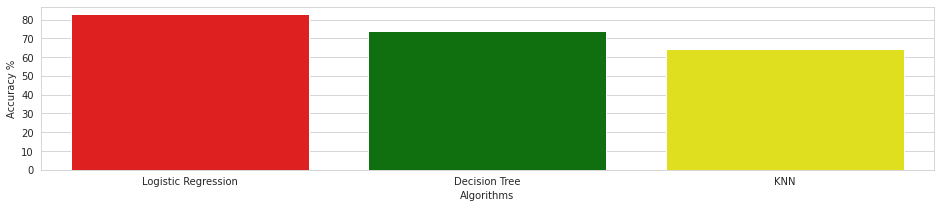

In [ ]:
colors = ["red", "green", "yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,3))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()